# Tutorial Overview
### This tutorial is divided into 4 parts; they are:

- Expected Value
- Variance
- Covariance
- Covariance Matrix

# Expected Value

## Finite case

Let $X$ be a random variable with a finite number of finite outcomes $x_1, x_2, \ldots, x_k$ occurring with probabilities $p_1, p_2, \ldots, p_k,$ respectively. The 'expectation' of $X$ is defined as

$\operatorname{E}[X] =\sum_{i=1}^k x_i\,p_i=x_1p_1 + x_2p_2 + \cdots + x_kp_k.$

Since all probabilities $p_i$ add up to 1 ($p_1 + p_2 + \cdots + p_k = 1$), the expected value is the weighted average, with $p_i$’s being the weights.

## Dice Roll Example

In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
N = 1000

In [3]:
roll = numpy.zeros(N, dtype=int)

In [4]:
expectation = numpy.zeros(N)

In [5]:
for i in range(N):
    roll[i] = numpy.random.randint(1, 7)

In [6]:
for i in range(1, N):
    expectation[i] = numpy.mean(roll[0:i])

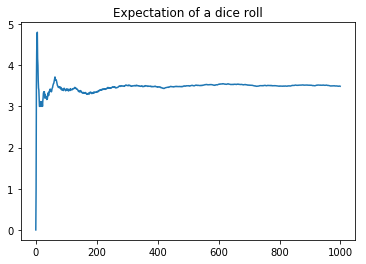

In [7]:
plt.plot(expectation)
plt.title("Expectation of a dice roll");

# Variance

## Definition
The variance of a random variable $X$ is the expected value of the squared deviation from the Expected value|mean of $X$ 
$$\mu = \operatorname{E}[X]$$:
$$ \operatorname{Var}(X) = \operatorname{E}\left[(X - \mu)^2 \right]. $$

This definition encompasses random variables that are generated by processes that are discrete random variable|discrete, continuous random variable|continuous, Cantor distribution|neither, or mixed. The variance can also be thought of as the covariance of a random variable with itself:

$$\operatorname{Var}(X) = \operatorname{Cov}(X, X).$$ 
The variance is also equivalent to the second cumulant of a probability distribution that generates $X$. The variance is typically designated as $\operatorname{Var}(X)$, $\sigma^2_X$, or simply $\sigma^2$ (pronounced "sigma squared"). The expression for the variance can be expanded:
$$\begin{align}
\operatorname{Var}(X) &= \operatorname{E}\left[(X - \operatorname{E}[X])^2\right] \\[4pt]
&= \operatorname{E}\left[X^2 - 2X\operatorname{E}[X] + \operatorname{E}[X]^2\right] \\[4pt]
&= \operatorname{E}\left[X^2\right] - 2\operatorname{E}[X]\operatorname{E}[X] + \operatorname{E}[X]^2 \\[4pt]
&= \operatorname{E}\left[X^2 \right] - \operatorname{E}[X]^2
\end{align}$$

In other words, the variance of $X$ is equal to the mean of the square of $X$ minus the square of the mean of $X$.  This equation should not be used for computations using floating point arithmetic because it suffers from catastrophic cancellation if the two components of the equation are similar in magnitude. There exist Algorithms for calculating variance|numerically stable alternatives.


## Dice Roll Example again

In [8]:
N = 1000

In [9]:
roll = numpy.zeros(N, dtype=int)

In [10]:
variance = numpy.zeros(N)

In [11]:
for i in range(N):
    roll[i] = numpy.random.randint(1, 7)

In [12]:
for i in range(1, N):
    variance[i] = numpy.var(roll[0:i])

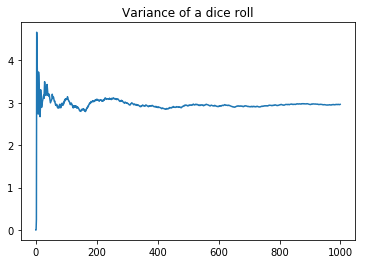

In [13]:
plt.plot(variance)
plt.title("Variance of a dice roll");

# Covariance

## Definition
For two jointly distributed real real-valued random variables $X$ and $Y$ with finite second moments, the covariance is defined as the expected value (or mean) of the product of their deviations from their individual expected values
$$\operatorname{cov}(X,Y) = \operatorname{E}{\big[(X - \operatorname{E}[X])(Y - \operatorname{E}[Y])\big]}$$

where $\operatorname{E}[X]$ is the expected value of $X$, also known as the mean of $X$. The covariance is also sometimes denoted $\sigma_{XY}$ or $\sigma(X,Y)$, in analogy to variance.  By using the linearity property of expectations, this can be simplified to the expected value of their product minus the product of their expected values:
$$
\begin{align}
\operatorname{cov}(X, Y)
&= \operatorname{E}\left[\left(X - \operatorname{E}\left[X\right]\right) \left(Y - \operatorname{E}\left[Y\right]\right)\right] \\
&= \operatorname{E}\left[X Y - X \operatorname{E}\left[Y\right] - \operatorname{E}\left[X\right] Y + \operatorname{E}\left[X\right] \operatorname{E}\left[Y\right]\right] \\
&= \operatorname{E}\left[X Y\right] - \operatorname{E}\left[X\right] \operatorname{E}\left[Y\right] - \operatorname{E}\left[X\right] \operatorname{E}\left[Y\right] + \operatorname{E}\left[X\right] \operatorname{E}\left[Y\right] \\
&= \operatorname{E}\left[X Y\right] - \operatorname{E}\left[X\right] \operatorname{E}\left[Y\right],
\end{align}
$$
but this equation is susceptible to Loss of catastrophic cancellation.

The units of measurement of the covariance $\operatorname{cov}(X,Y)$ are those of $X$ times those of $Y$. By contrast, correlation coefficients, which depend on the covariance, are a dimensionless measure of linear dependence. (In fact, correlation coefficients can simply be understood as a normalized version of covariance.)

## Iris Dataset Example

In [14]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn.apionly as sns
from sklearn import datasets
%matplotlib inline

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [15]:
iris_data = datasets.load_iris()

In [16]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
df = pd.concat(
    [pd.DataFrame(iris_data['data'], columns=iris_data['feature_names']),
     pd.DataFrame(iris_data['target'], columns=['target'])], 
    axis=1) 

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
df.target = df.target.apply(lambda x: iris_data['target_names'][x])

In [21]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### create scatterplot matrix

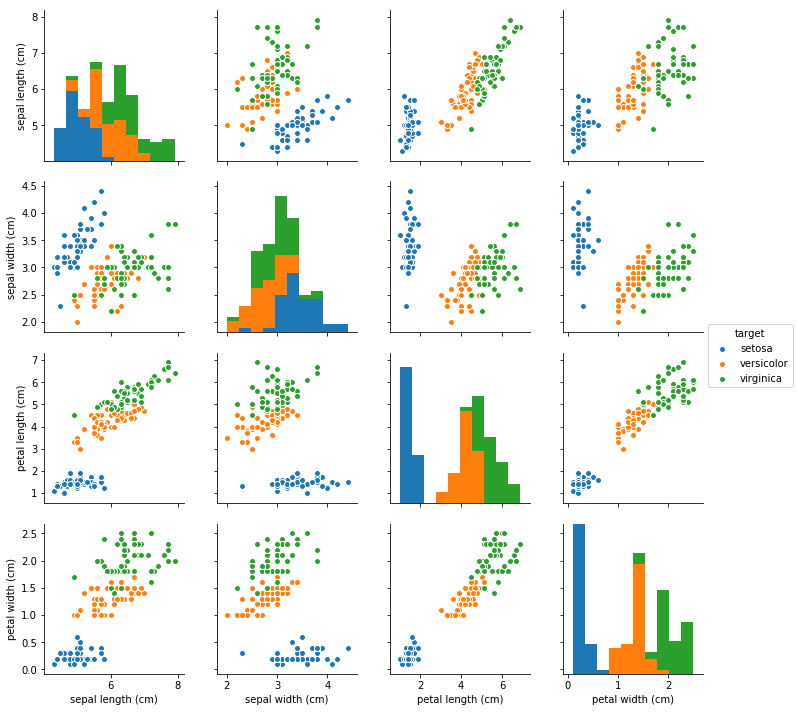

In [22]:
fig = sns.pairplot(data=df, 
                   hue='target')

plt.show()

In [23]:
X = df[df.columns[:-1]].values
X.shape

(150, 4)

## Sample Covariance
measures how two variables differ from their mean
positive covariance: that the two variables are both above or both below their respective means
variables with a positive covariance are positively "correlated" -- they go up or done together
negative covariance: valuables from one variable tends to be above the mean and the other below their mean
in other words, negative covariance means that if one variable goes up, the other variable goes down
$$\sigma_{x,y} = \frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$
note that similar to variance, the dimension of the covariance is $unit^2$
covariance can be understood as the "variability due to codependence" whereas the variance is the "independent variability"

In [24]:
x_mean, y_mean = np.mean(X[:, 2:4], axis=0)

In [25]:
sum([(x - x_mean) * (y - y_mean) 
     for x, y in zip(X[:, 2], X[:, 3])]) / (X.shape[0] - 1)

1.2956093959731545

# Covariance Matrix

## Definition
Throughout this article, boldfaced unsubscripted $\mathbf{X}$ and $\mathbf{Y}$ are used to refer to random vectors, and unboldfaced subscripted $X_i$ and $Y_i$ are used to refer to scalar random variables.

If the entries in the column vector

$\mathbf{X}=(X_1, X_2, ... , X_n)^{\mathrm T}$

are random variables, each with finite variance and expected value, then the covariance matrix $\operatorname{K}_{\mathbf{X}\mathbf{X}}$ is the matrix whose $(i,j)$ entry is the covariance

$\operatorname{K}_{X_i X_j} = \operatorname{cov}[X_i, X_j] = \operatorname{E}[(X_i - \operatorname{E}[X_i])(X_j - \operatorname{E}[X_j])]$

where the operator $\operatorname{E}$ denotes the expected value (mean) of its argument.

In other words,

$
\operatorname{K}_{\mathbf{X}\mathbf{X}}=
\begin{bmatrix}
 \mathrm{E}[(X_1 - \operatorname{E}[X_1])(X_1 - \operatorname{E}[X_1])] & \mathrm{E}[(X_1 - \operatorname{E}[X_1])(X_2 - \operatorname{E}[X_2])] & \cdots & \mathrm{E}[(X_1 - \operatorname{E}[X_1])(X_n - \operatorname{E}[X_n])] \\ \\
 \mathrm{E}[(X_2 - \operatorname{E}[X_2])(X_1 - \operatorname{E}[X_1])] & \mathrm{E}[(X_2 - \operatorname{E}[X_2])(X_2 - \operatorname{E}[X_2])] & \cdots & \mathrm{E}[(X_2 - \operatorname{E}[X_2])(X_n - \operatorname{E}[X_n])] \\ \\
 \vdots & \vdots & \ddots & \vdots \\ \\
 \mathrm{E}[(X_n - \operatorname{E}[X_n])(X_1 - \operatorname{E}[X_1])] & \mathrm{E}[(X_n - \operatorname{E}[X_n])(X_2 - \operatorname{E}[X_2])] & \cdots & \mathrm{E}[(X_n - \operatorname{E}[X_n])(X_n - \operatorname{E}[X_n])]
\end{bmatrix}
$



### Covariance of Iris dataset Features

In [26]:
numpy.cov(X.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [27]:
covariance_matrix = pd.DataFrame(numpy.cov(X.T), columns=iris_data['feature_names'], index=iris_data['feature_names'])

In [28]:
covariance_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


## Heatmap of Covariance Matrix

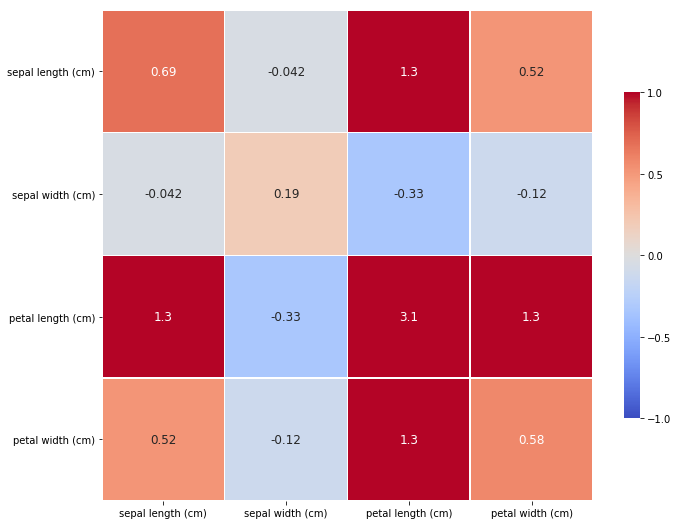

In [29]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(covariance_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(covariance_matrix.columns, rotation = 0)
ax.set_xticklabels(covariance_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
